In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm
import regex as re

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import ElasticNetCV, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

In [0]:
def pipeline(model, X_train, X_test, y_train, y_test):
    
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    
    rmse_score = np.sqrt(mean_squared_error(y_test, preds))
    mape_score = mean_absolute_percentage_error(y_test, preds)
    r2 = r2_score(y_test, preds)
    
    return rmse_score, mape_score, r2

In [0]:
data = pd.read_csv("/dbfs/FileStore/hakan/merged_dataset.csv")
# data = pd.read_csv("merged_dataset.csv")
X = data.drop(columns=["price"])
y = data["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

print(f"Shape of the whole dataset: {X.shape} {y.shape}")
print(f"Shape of the train set: {X_train.shape} {y_train.shape}")
print(f"Shape of the test set: {X_test.shape} {y_test.shape}")

Shape of the whole dataset: (194606, 4) (194606,)
Shape of the train set: (155684, 4) (155684,)
Shape of the test set: (38922, 4) (38922,)


# Experimentation

In [0]:
model_scores = {}

## ElasticNetCV

In [0]:
elastic = ElasticNetCV(l1_ratio=1, eps=0.0001)

rmse, mape, r2 = pipeline(elastic, X_train, X_test, y_train, y_test)

model_scores["ElasticNet"] = [rmse, mape, r2]
model_scores["ElasticNet"]

[412.4543305262474, 0.4067154219255461, 0.1115912616323107]

## SVR

In [0]:
svreg = SVR(verbose=True)

rmse, mape, r2 = pipeline(svreg, X_train, X_test, y_train, y_test)

model_scores["SVR"] = [rmse, mape, r2]
model_scores["SVR"]

[LibSVM]

[418.3552645041692, 0.3693737707530278, 0.08598870442741224]

## KNN

In [0]:
knn = KNeighborsRegressor(n_neighbors=20)

rmse, mape, r2 = pipeline(knn, X_train, X_test, y_train, y_test)

model_scores["KNN"] = [rmse, mape, r2]
model_scores["KNN"]

[382.1247399522417, 0.3314606903673276, 0.2374446043570424]

## Decision Tree

In [0]:
tree = DecisionTreeRegressor()

rmse, mape, r2 = pipeline(tree, X_train, X_test, y_train, y_test)

model_scores["DecisionTree"] = [rmse, mape, r2]
model_scores["DecisionTree"]

[378.4636690156029, 0.32426895474289674, 0.2519864299788679]

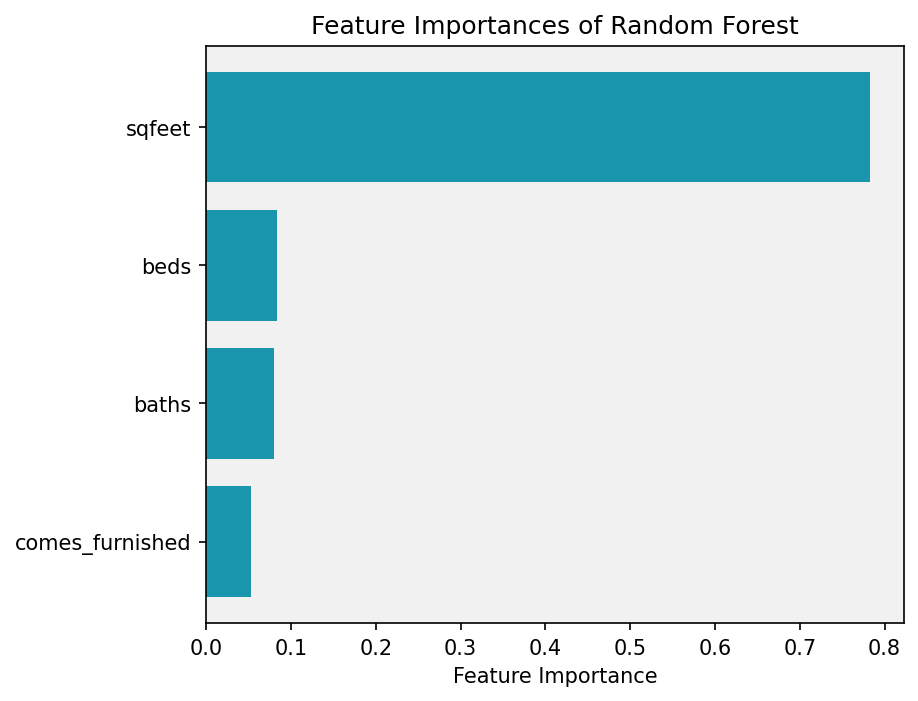

In [0]:
importances = pd.Series({i:j for i,j in zip(X.columns, tree.feature_importances_)}).sort_values()

fig, ax = plt.subplots(figsize=(6,5), dpi=150)
ax.set_facecolor("#f1f1f2")

plt.barh(importances.index, importances.values, color="#1995ad")
plt.title("Feature Importances of Random Forest")
plt.xlabel("Feature Importance");

## RandomForest

In [0]:
rf = RandomForestRegressor(n_estimators=50, verbose=1)

rmse, mape, r2 = pipeline(rf, X_train, X_test, y_train, y_test)

model_scores["RandomForest"] = [rmse, mape, r2]
model_scores["RandomForest"]

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    4.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.3s finished


[374.5950580941685, 0.32346957739547344, 0.2672004851010914]

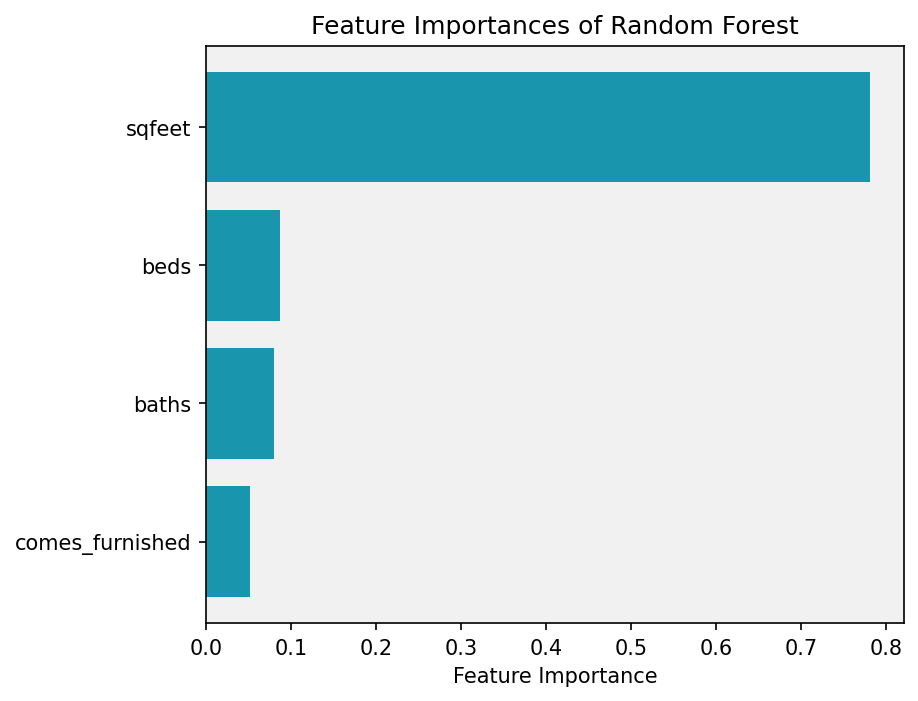

In [0]:
importances = pd.Series({i:j for i,j in zip(X.columns, rf.feature_importances_)}).sort_values()

fig, ax = plt.subplots(figsize=(6,5), dpi=150)
ax.set_facecolor("#f1f1f2")

plt.barh(importances.index, importances.values, color="#1995ad")
plt.title("Feature Importances of Random Forest")
plt.xlabel("Feature Importance");

## AdaBoost

In [0]:
ada = AdaBoostRegressor(learning_rate=0.01)

rmse, mape, r2 = pipeline(ada, X_train, X_test, y_train, y_test)

model_scores["AdaBoost"] = [rmse, mape, r2]
model_scores["AdaBoost"]

[414.6420459176331, 0.3991083099284287, 0.10214177910310185]

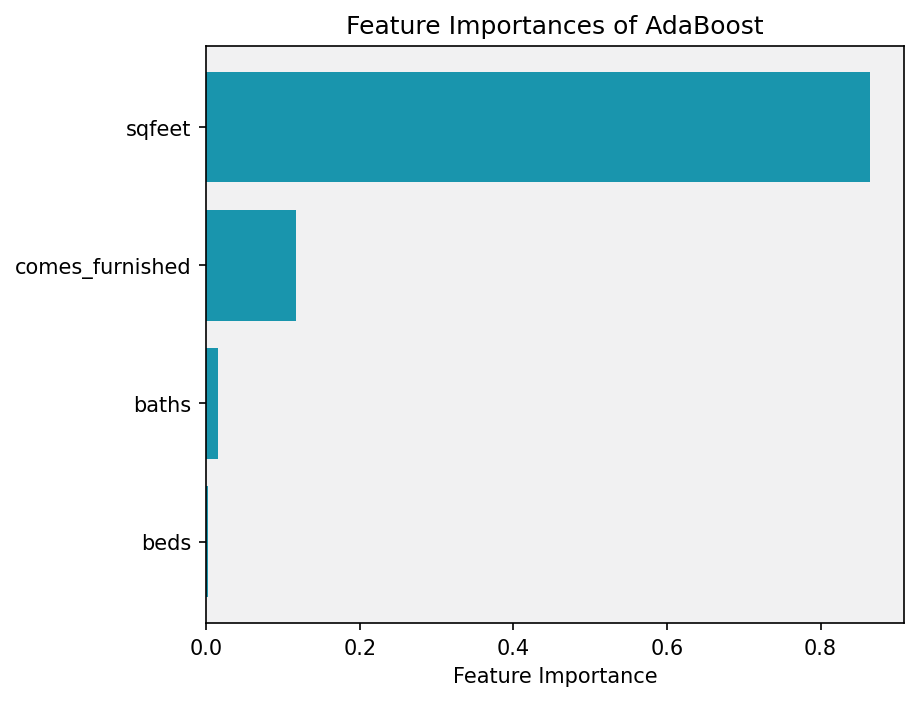

In [0]:
importances = pd.Series({i:j for i,j in zip(X.columns, ada.feature_importances_)}).sort_values()

fig, ax = plt.subplots(figsize=(6,5), dpi=150)
ax.set_facecolor("#f1f1f2")

plt.barh(importances.index, importances.values, color="#1995ad")
plt.title("Feature Importances of AdaBoost")
plt.xlabel("Feature Importance");

## XGBoost

In [0]:
xgb = XGBRegressor(n_estimators=200, learning_rate=0.2)

rmse, mape, r2 = pipeline(xgb, X_train, X_test, y_train, y_test)

model_scores["XGBoost"] = [rmse, mape, r2]
model_scores["XGBoost"]

[378.9765997332536, 0.33952784559890004, 0.24995749474238704]

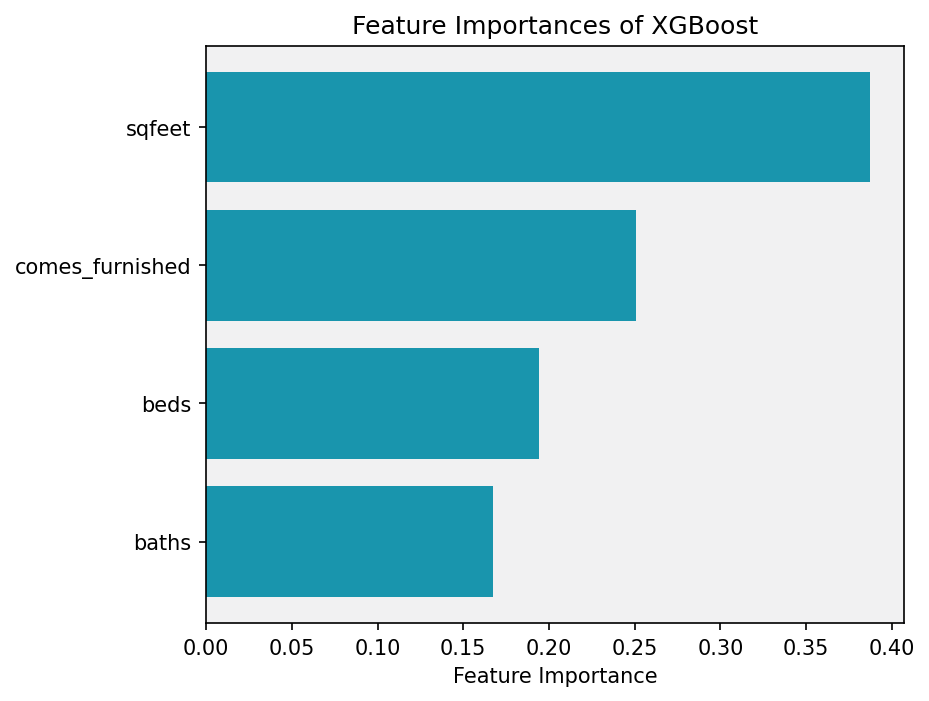

In [0]:
importances = pd.Series({i:j for i,j in zip(X.columns, xgb.feature_importances_)}).sort_values()

fig, ax = plt.subplots(figsize=(6,5), dpi=150)
ax.set_facecolor("#f1f1f2")

plt.barh(importances.index, importances.values, color="#1995ad")
plt.title("Feature Importances of XGBoost")
plt.xlabel("Feature Importance");

---

In [0]:
results = pd.DataFrame(model_scores, index=["RMSE", "MAPE", "R2"]).T
results

,RMSE,MAPE,R2
ElasticNet,412.454331,0.406715,0.111591
SVR,418.355265,0.369374,0.085989
KNN,382.124740,0.331461,0.237445
DecisionTree,378.463669,0.324269,0.251986
RandomForest,374.595058,0.323470,0.267200
AdaBoost,414.642046,0.399108,0.102142
XGBoost,378.976600,0.339528,0.249957
